In [1]:
!pip install -q kaggle

In [2]:
! pip show kaggle

Name: kaggle
Version: 1.5.12
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: c:\users\lee\anaconda3\lib\site-packages
Requires: tqdm, python-slugify, certifi, requests, python-dateutil, six, urllib3
Required-by: 


In [3]:
!kaggle config view

Configuration values from C:\Users\Lee\.kaggle
- username: woolyj
- path: None
- proxy: None
- competition: None


In [4]:
!kaggle datasets download -d behrad3d/nasa-cmaps

2022-05-07 21:03:22,202 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000260B2171AC0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /api/v1/datasets/download/behrad3d/nasa-cmaps
2022-05-07 21:03:22,203 WARNING Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000260B5027AC0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /api/v1/datasets/download/behrad3d/nasa-cmaps
2022-05-07 21:03:22,203 WARNING Retrying (Retry(total=0, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000260B503FC70>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /api/

In [5]:
import shutil

filename = 'nasa-cmaps.zip'
extrac_dir = 'nasa-cmaps'
archive_format = 'zip'

shutil.unpack_archive(filename, extrac_dir, archive_format)

In [6]:
import os
os.listdir()

['.ipynb_checkpoints', 'nasa-cmaps', 'nasa-cmaps.zip', 'Untitled.ipynb']

In [7]:
os.listdir('nasa-cmaps/CMAps/')

['Damage Propagation Modeling.pdf',
 'readme.txt',
 'RUL_FD001.txt',
 'RUL_FD002.txt',
 'RUL_FD003.txt',
 'RUL_FD004.txt',
 'test_FD001.txt',
 'test_FD002.txt',
 'test_FD003.txt',
 'test_FD004.txt',
 'train_FD001.txt',
 'train_FD002.txt',
 'train_FD003.txt',
 'train_FD004.txt',
 'x.txt']

In [8]:

import pandas as pd
import numpy as np


columns = ["unit","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]

sensor_columns = columns[5:]

train_df = pd.read_csv("nasa-cmaps/CMaps/train_FD001.txt", sep=" ",names=columns)
test_df = pd.read_csv("nasa-cmaps/CMaps/test_FD001.txt", sep=" ",names=columns)
label = pd.read_csv("nasa-cmaps/CMaps/RUL_FD001.txt")

In [9]:
train_df.drop(['sensor22', 'sensor23'],axis=1,inplace=True)

[32, 47, 83]


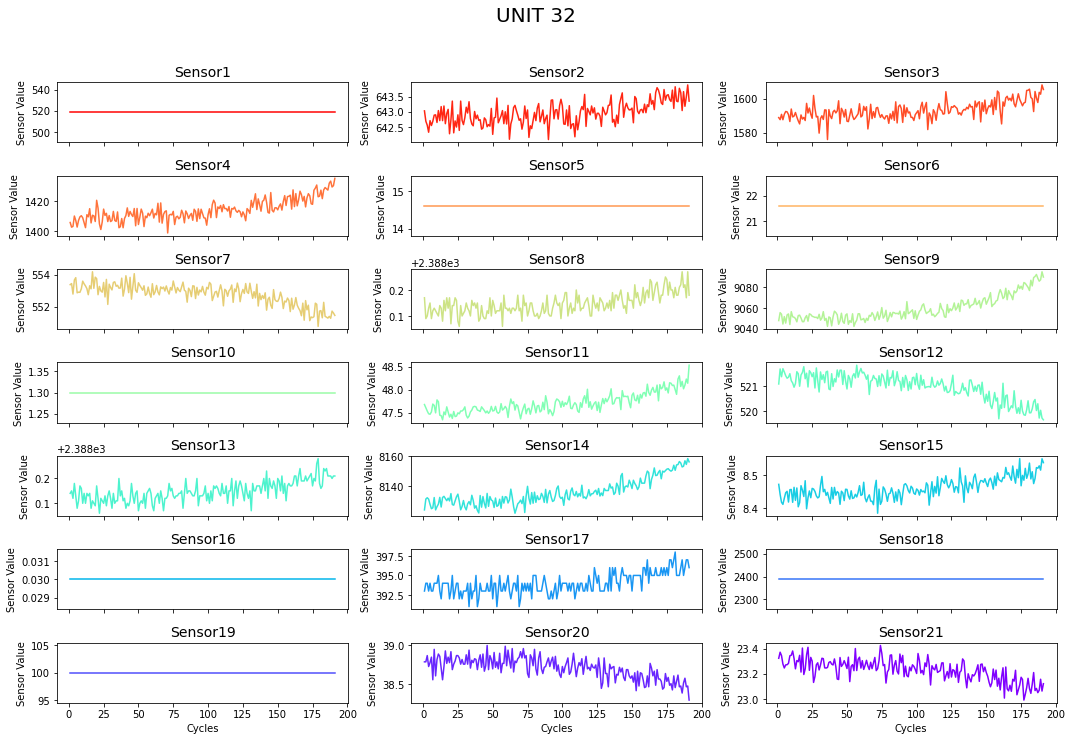

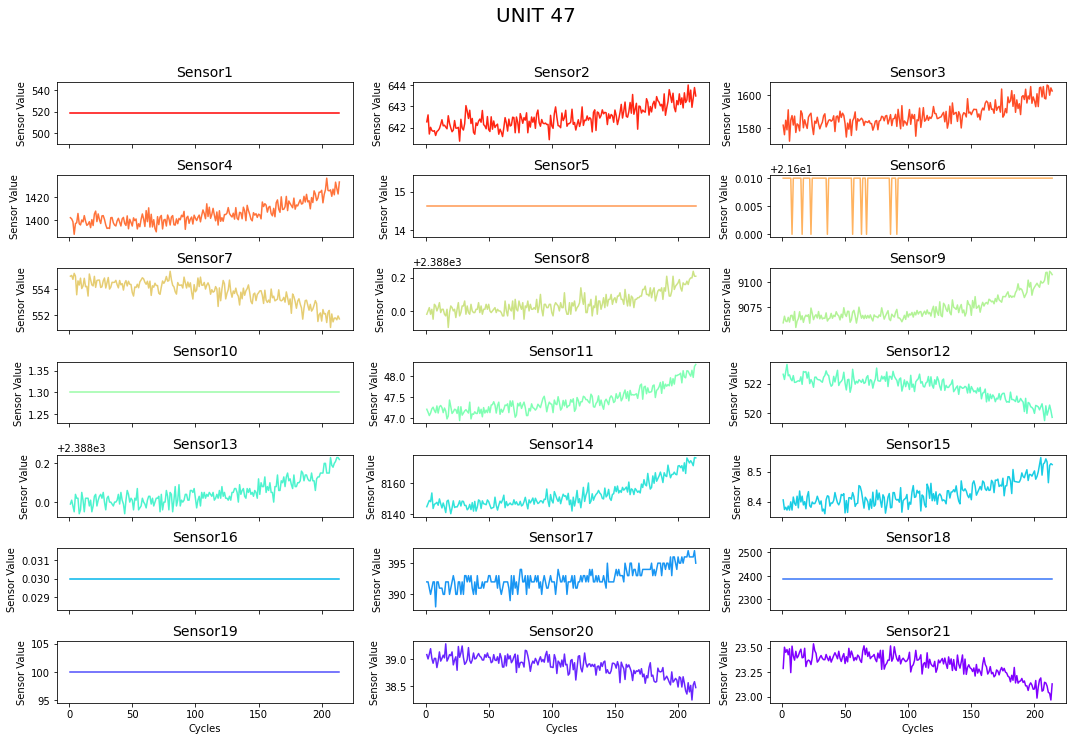

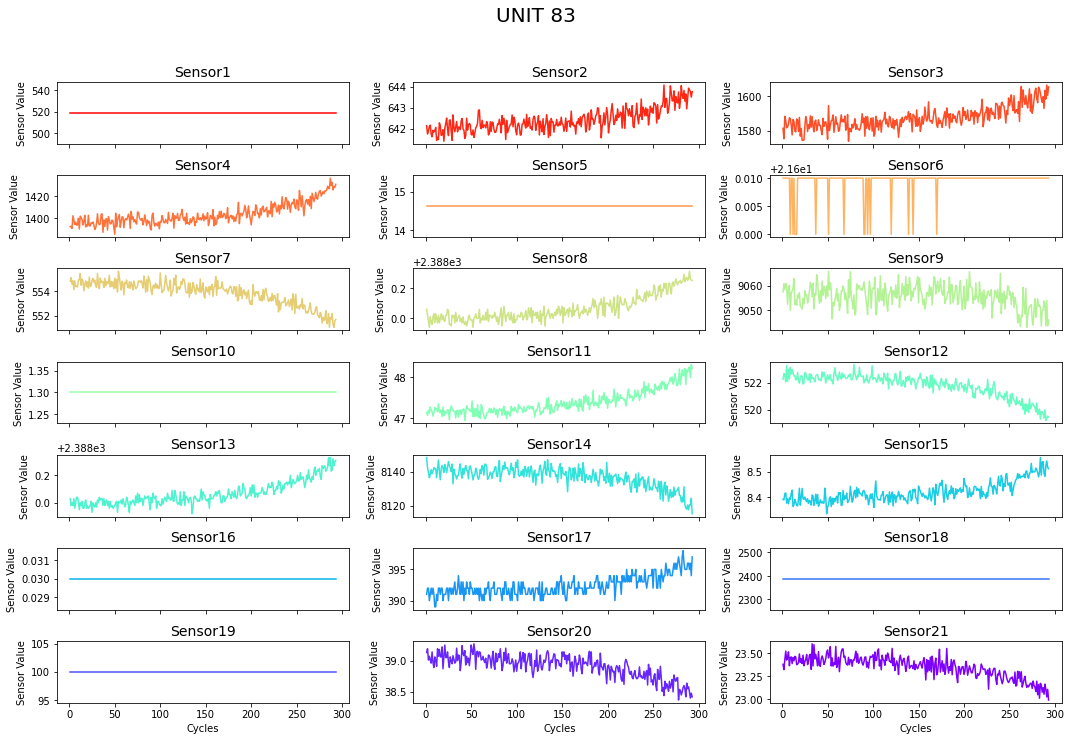

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

def visualization(df, unit,colors,sensor_num):
    df_slice = df[(df.unit == unit)]

    fig, axes = plt.subplots(7, 3, figsize=(15, 10), sharex=True)
    axes = axes.flatten()
    for i in range(21):
        sensor_col = sensor_columns[i]
        df_slice.plot(x='cycle', y=sensor_col, ax=axes[i],color = colors[20-i],legend=False);
        axes[i].set_ylabel("Sensor Value")
        axes[i].set_xlabel("Cycles");
        axes[i].set_title(sensor_col.title(), size=14);
    title_name = "UNIT "+ str(unit)
    fig.suptitle(title_name, size=20, y=1.025)
    fig.tight_layout();

import random
random_num = 3
random_unit = []
for i in range(random_num):
    random_unit.append(random.randint(1,100))
print(random_unit)

colors = plt.cm.rainbow(np.linspace(0,1,21))
for unit in random_unit:
    visualization(train_df, unit, colors, 21)

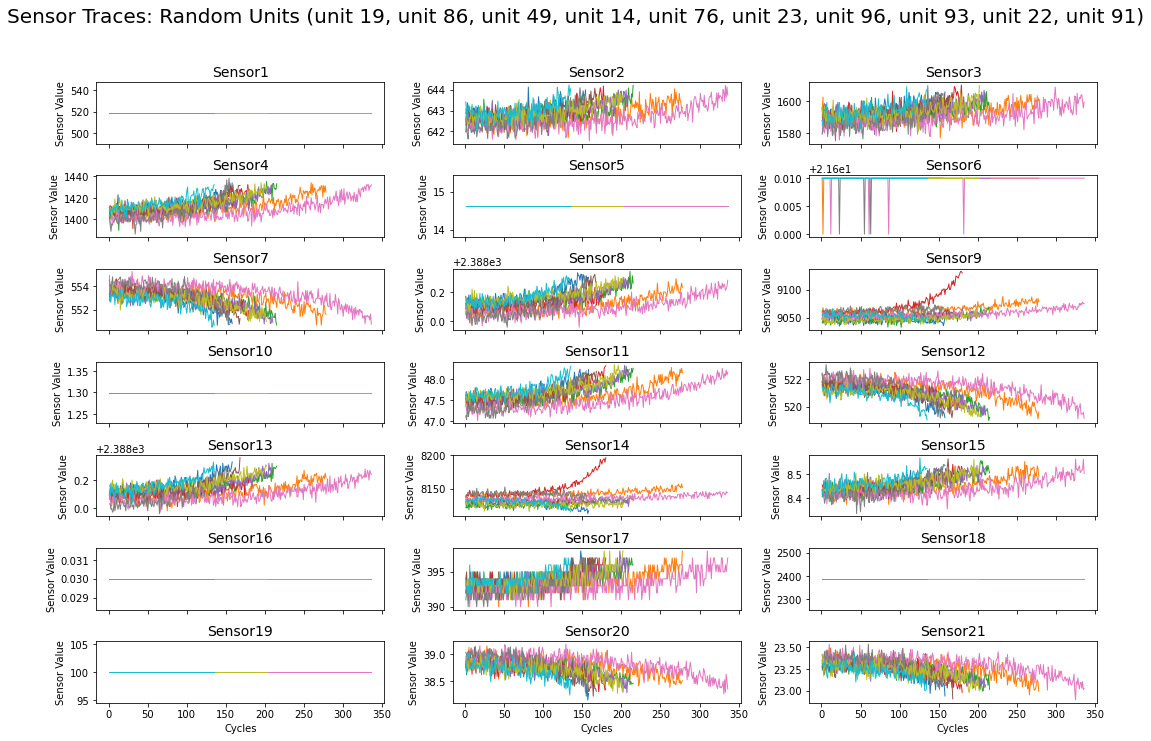

In [11]:
import random
random_num = 10
random_unit = []
for i in range(random_num):
    random_unit.append(random.randint(1,100))

#print(random_unit)
random_df = train_df[train_df['unit'].isin(random_unit)]
#print(random_df['unit'].value_counts())
#print(random_df[random_df['unit']==random_unit[0]])
def visualization_groupby_random_unit(df, units, sensor_num=21):
    
    fig, axes = plt.subplots(7, 3, figsize=(15, 10), sharex=True)
    axes = axes.flatten()
    
    for i in range(21):
        sensor_col = sensor_columns[i]
        df.groupby('unit')
        
        for j in units:
            df[df['unit']==j].plot(x='cycle',y=sensor_col, ax=axes[i],legend=False, linewidth = "1")
        axes[i].set_ylabel("Sensor Value")
        axes[i].set_xlabel("Cycles");
        axes[i].set_title(sensor_col.title(), size=14);
    title_name = "Sensor Traces: Random Units ("+"unit "+str(units[0])+", "+"unit "+str(units[1])+", "+"unit "+str(units[2])+", "+"unit "+str(units[3])+", "+"unit "+str(units[4])+", "+"unit "+str(units[5])+", "+"unit "+str(units[6])+", "+"unit "+str(units[7])+", "+"unit "+str(units[8])+", "+"unit "+str(units[9])+")"
    fig.suptitle(title_name, size=20, y=1.025)
    fig.tight_layout();
    
visualization_groupby_random_unit(random_df, random_unit,sensor_num=21)

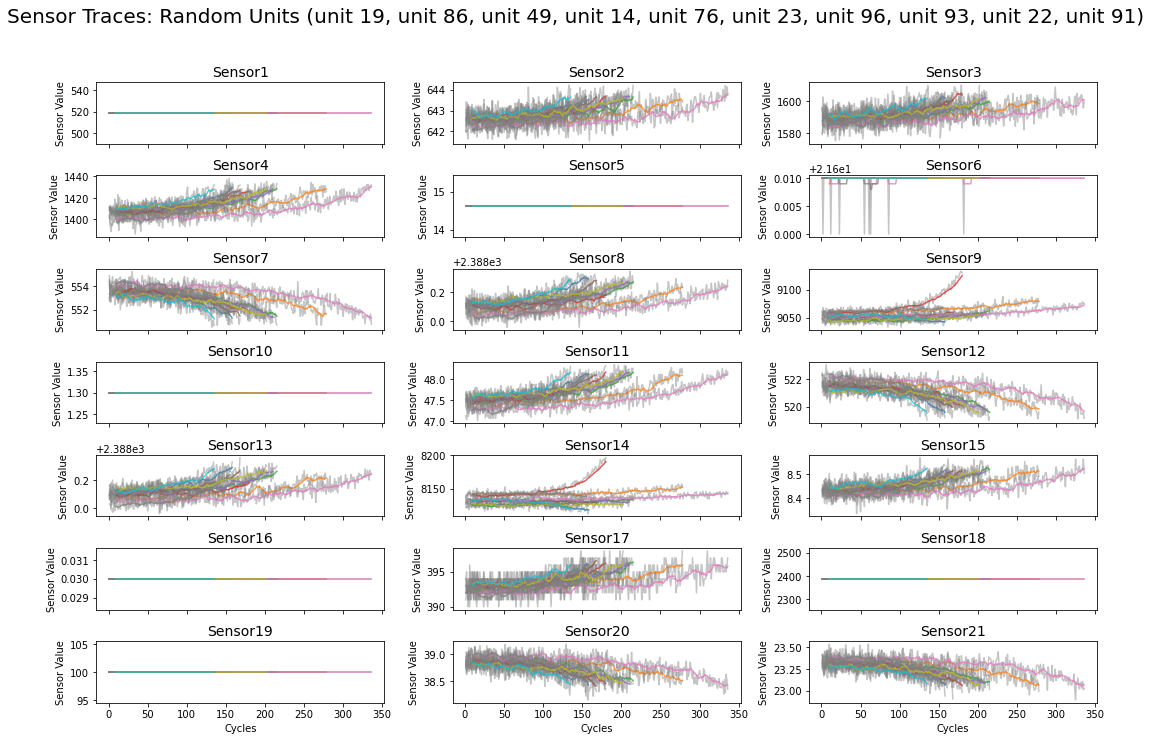

In [12]:
def visualization_groupby_random_unit_with_mean(df, units, sensor_num=21):
    
    fig, axes = plt.subplots(7, 3, figsize=(15, 10), sharex=True)
    axes = axes.flatten()
    
    for i in range(21):
        sensor_col = sensor_columns[i]
        df.groupby('unit')
        
        for j in units:
            df[df['unit']==j].plot(x='cycle',y=sensor_col, alpha = 0.45,color = 'gray', ax=axes[i],legend=False)
            df[df['unit']==j].rolling(window=10, on='cycle').mean().plot(x='cycle',y=sensor_col,alpha=0.75, ax=axes[i],legend=False)
        axes[i].set_ylabel("Sensor Value")
        axes[i].set_xlabel("Cycles");
        axes[i].set_title(sensor_col.title(), size=14);
    title_name = "Sensor Traces: Random Units ("+"unit "+str(units[0])+", "+"unit "+str(units[1])+", "+"unit "+str(units[2])+", "+"unit "+str(units[3])+", "+"unit "+str(units[4])+", "+"unit "+str(units[5])+", "+"unit "+str(units[6])+", "+"unit "+str(units[7])+", "+"unit "+str(units[8])+", "+"unit "+str(units[9])+")"
    fig.suptitle(title_name, size=20, y=1.025)
    fig.tight_layout();
    
visualization_groupby_random_unit_with_mean(random_df, random_unit,sensor_num=21)

In [13]:
max = train_df.groupby('unit')['cycle'].max()

result_df = train_df.merge(max.to_frame(name='max'),left_on='unit',right_index=True)
remaining = result_df['cycle']-result_df['max']
result_df['remain']=remaining
RUL = result_df['max']-result_df['cycle']
result_df['RUL']=RUL
result_df = result_df.drop('max',axis=1)

result_df.head()

,unit,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remain,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,-191,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,-190,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,-189,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,-188,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,-187,187


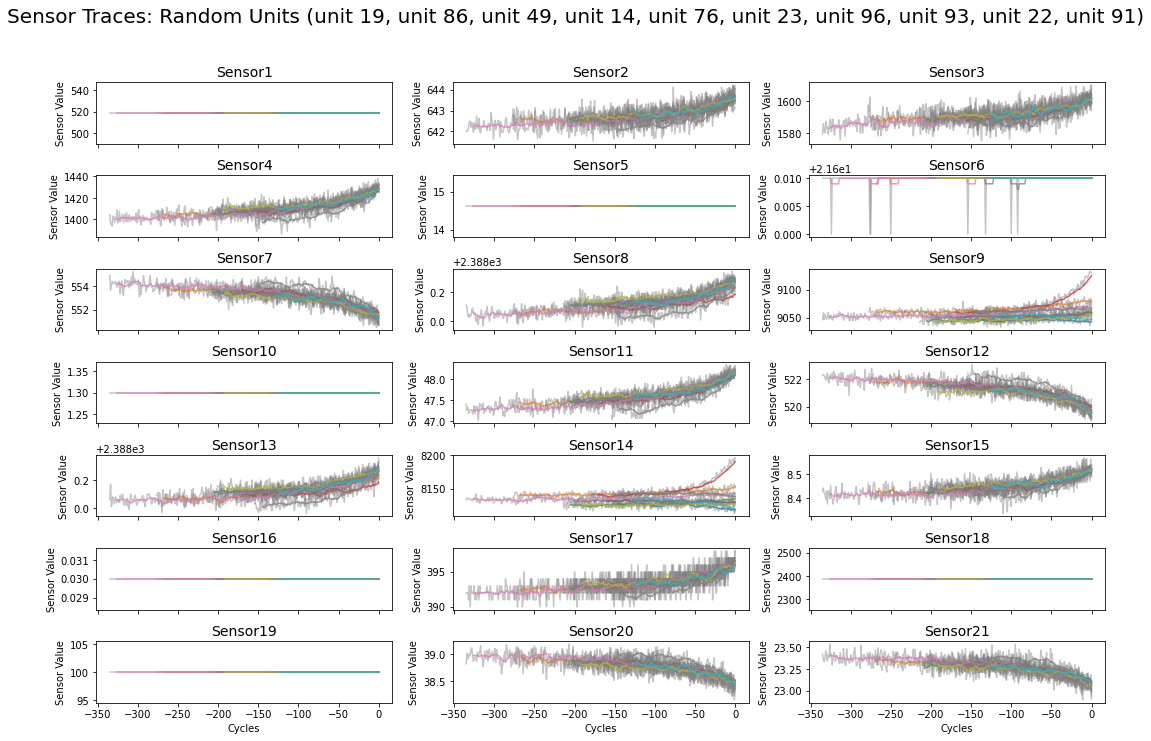

In [14]:
def visualization_groupby_random_unit_with_mean_RUL(df, units, sensor_num=21):
    
    fig, axes = plt.subplots(7, 3, figsize=(15, 10), sharex=True)
    axes = axes.flatten()
    
    for i in range(21):
        sensor_col = sensor_columns[i]
        df.groupby('unit')
        
        for j in units:
            df[df['unit']==j].plot(x='remain',y=sensor_col, alpha = 0.45,color = 'gray', ax=axes[i],legend=False)
            df[df['unit']==j].rolling(window=10, on='remain').mean().plot(x='remain',y=sensor_col,alpha=0.75, ax=axes[i],legend=False)
        axes[i].set_ylabel("Sensor Value")
        axes[i].set_xlabel("Cycles");
        axes[i].set_title(sensor_col.title(), size=14);
    title_name = "Sensor Traces: Random Units ("+"unit "+str(units[0])+", "+"unit "+str(units[1])+", "+"unit "+str(units[2])+", "+"unit "+str(units[3])+", "+"unit "+str(units[4])+", "+"unit "+str(units[5])+", "+"unit "+str(units[6])+", "+"unit "+str(units[7])+", "+"unit "+str(units[8])+", "+"unit "+str(units[9])+")"
    fig.suptitle(title_name, size=20, y=1.025)
    fig.tight_layout();
    
random_df = result_df[result_df['unit'].isin(random_unit)]
visualization_groupby_random_unit_with_mean_RUL(random_df, random_unit,sensor_num=21)

In [15]:
result_df.drop(columns=['sensor1','sensor5','sensor6','sensor10','sensor16','sensor18','sensor19','remain'],inplace=True)
result_df.head()

,unit,cycle,op1,op2,op3,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,RUL
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


In [16]:
from sklearn.preprocessing import StandardScaler
def add_operating_condition(df):
    df_op_cond = df.copy()
    
    df_op_cond['op1'] = abs(df_op_cond['op1'].round())
    df_op_cond['op2'] = abs(df_op_cond['op2'].round(decimals=2))
    
    # converting settings to string and concatanating makes the operating condition into a categorical variable
    df_op_cond['op_cond'] = df_op_cond['op1'].astype(str) + '_' + \
                        df_op_cond['op2'].astype(str) + '_' + \
                        df_op_cond['op3'].astype(str)
    
    return df_op_cond

def condition_scaler(df_train, df_test, sensor_names):
    # apply operating condition specific scaling
    scaler = StandardScaler()
    for condition in df_train['op_cond'].unique():
        scaler.fit(df_train.loc[df_train['op_cond']==condition, sensor_names])
        df_train.loc[df_train['op_cond']==condition, sensor_names] = scaler.transform(df_train.loc[df_train['op_cond']==condition, sensor_names])
        df_test.loc[df_test['op_cond']==condition, sensor_names] = scaler.transform(df_test.loc[df_test['op_cond']==condition, sensor_names])
    return df_train, df_test

def exponential_smoothing(df, sensors, n_samples, alpha=0.4):
    df = df.copy()
    # first, take the exponential weighted mean
    df[sensors] = df.groupby('unit')[sensors].apply(lambda x: x.ewm(alpha=alpha).mean()).reset_index(level=0, drop=True)
    
    # second, drop first n_samples of each unit_nr to reduce filter delay
    def create_mask(data, samples):
        result = np.ones_like(data)
        result[0:samples] = 0
        return result
    
    mask = df.groupby('unit')['unit'].transform(create_mask, samples=n_samples).astype(bool)
    df = df[mask]
    
    return df

In [17]:
threshold = 125

result_df['RUL'].clip(upper=threshold, inplace=True)
X_train_pre = add_operating_condition(result_df)
X_test_pre = add_operating_condition(test_df)

sensors = ['sensor2','sensor3','sensor4','sensor7','sensor8','sensor9','sensor11','sensor12','sensor13','sensor14','sensor15','sensor17','sensor20','sensor21']


In [18]:
X_train_pre, X_test_pre = condition_scaler(X_train_pre, X_test_pre, sensors)


In [19]:
alpha = 0.1
sequence_length = 30
X_train_pre= exponential_smoothing(X_train_pre, sensors, 0, alpha)
X_test_pre = exponential_smoothing(X_test_pre, sensors, 0, alpha)


In [20]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(n_splits=1, train_size=0.80, random_state=42)

In [21]:
def gen_train_data(df, sequence_length, columns):
    data = df[columns].values
    num_elements = data.shape[0]

    for start, stop in zip(range(0, num_elements-(sequence_length-1)), range(sequence_length, num_elements+1)):
        yield data[start:stop, :]
def gen_data_wrapper(df, sequence_length, columns, unit_nrs=np.array([])):
    if unit_nrs.size <= 0:
        unit_nrs = df['unit'].unique()
        
    data_gen = (list(gen_train_data(df[df['unit']==unit_nr], sequence_length, columns))
               for unit_nr in unit_nrs)
    data_array = np.concatenate(list(data_gen)).astype(np.float32)
    return data_array

def gen_labels(df, sequence_length, label):
    data_matrix = df[label].values
    num_elements = data_matrix.shape[0]

    return data_matrix[sequence_length-1:num_elements, :]  

def gen_label_wrapper(df, sequence_length, label, unit_nrs=np.array([])):
    if unit_nrs.size <= 0:
        unit_nrs = df['unit'].unique()
        
    label_gen = [gen_labels(df[df['unit']==unit_nr], sequence_length, label) for unit_nr in unit_nrs]
    label_array = np.concatenate(label_gen).astype(np.float32)
    return label_array

def gen_test_data(df, sequence_length, columns, mask_value):
    if df.shape[0] < sequence_length:
        data_matrix = np.full(shape=(sequence_length, len(columns)), fill_value=mask_value) # pad
        idx = data_matrix.shape[0] - df.shape[0]
        data_matrix[idx:,:] = df[columns].values  # fill with available data
    else:
        data_matrix = df[columns].values
        
    # specifically yield the last possible sequence
    stop = data_matrix.shape[0]
    start = stop - sequence_length
    for i in list(range(1)):
        yield data_matrix[start:stop, :] 

In [22]:
for train_unit, val_unit in gss.split(X_train_pre['unit'].unique(), groups=X_train_pre['unit'].unique()): 
    train_unit = X_train_pre['unit'].unique()[train_unit]  # gss returns indexes and index starts at 1
    val_unit = X_train_pre['unit'].unique()[val_unit]

    x_train = gen_data_wrapper(X_train_pre, sequence_length, sensors, train_unit)
    y_train = gen_label_wrapper(X_train_pre, sequence_length, ['RUL'], train_unit)
    x_val = gen_data_wrapper(X_train_pre, sequence_length, sensors, val_unit)
    y_val = gen_label_wrapper(X_train_pre, sequence_length, ['RUL'], val_unit)
    
    
    test_gen = (list(gen_test_data(X_test_pre[X_test_pre['unit']==unit_nr], sequence_length, sensors, -99.)) for unit_nr in X_test_pre['unit'].unique())
    x_test = np.concatenate(list(test_gen)).astype(np.float32)

In [23]:
y_test = pd.read_csv("nasa-cmaps/CMaps/RUL_FD001.txt",sep=r'\s+', header=None, names=['RemainingUsefulLife'])

In [24]:
y_test = y_test['RemainingUsefulLife']

In [25]:
timesteps = x_train.shape[1]
input_dim = x_train.shape[2]
intermediate_dim = 300
batch_size = 128
latent_dim = 2
epochs = 10000
optimizer = 'adam'

In [26]:
import random
import tensorflow as tf
from tensorflow.keras.layers import Dense # tf -> tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional, Masking

optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
masking_value = -99.

In [27]:
inputs = Input(shape=(timesteps,input_dim,),name='encoder_input')
mask = Masking(mask_value=masking_value)(inputs)
h = Bidirectional(LSTM(intermediate_dim))(mask)
mu = Dense(latent_dim)(h)
sigma= Dense(latent_dim)(h)

class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mu, sigma = inputs
        batch = tf.shape(mu)[0]
        dim = tf.shape(mu)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mu + tf.exp(0.5 * sigma) * epsilon
z = Sampling()([mu, sigma])
encoder = keras.Model(inputs, [z, mu, sigma], name='encoder_input')
print(encoder.summary())

Model: "encoder_input"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 30, 14)]     0           []                               
                                                                                                  
 masking (Masking)              (None, 30, 14)       0           ['encoder_input[0][0]']          
                                                                                                  
 bidirectional (Bidirectional)  (None, 600)          756000      ['masking[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 2)            1202        ['bidirectional[0][0]']          
                                                                                      

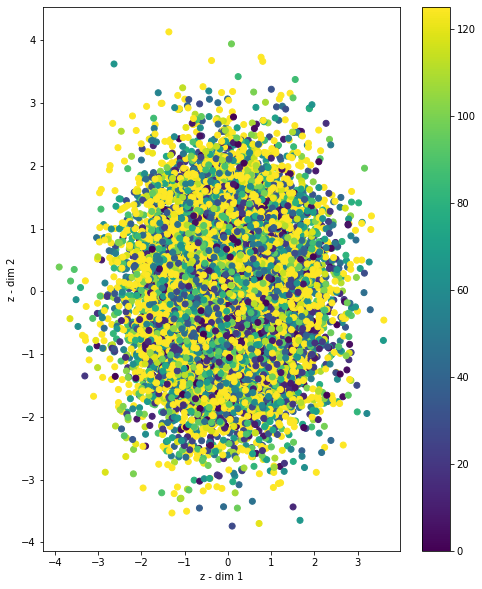

In [28]:
data = x_train
targets = y_train
epoch = 'Final'
save=  False
show = True
z, _, _  = encoder.predict(data)
plt.figure(figsize=(8, 10))
if len(targets)>0:
    plt.scatter(z[:, 0], z[:, 1], c=targets)
else:
    plt.scatter(z[:, 0], z[:, 1])
plt.xlabel('z - dim 1')
plt.ylabel('z - dim 2')
plt.colorbar()
if show:
    plt.show()
if save:
    plt.savefig('./images/latent_space_epoch'+str(epoch)+'.png')